## 54 - NDBC Time Series with Siphon

[Youtube](https://www.youtube.com/watch?v=ovqlYlI7l5A)

In [1]:
from siphon.simplewebservice.ndbc import NDBC
import matplotlib.pyplot as plt

In [2]:
data_aval = NDBC.buoy_data_types('41002')
print(data_aval)

{'txt': 'standard meteorological data', 'spec': 'spectral wave summaries', 'data_spec': 'raw spectral wave data', 'swdir': 'spectral wave data (alpha1)', 'swdir2': 'spectral wave data (alpha2)', 'swr1': 'spectral wave data (r1)', 'swr2': 'spectral wave data (r2)', 'supl': 'supplemental measurements data'}


In [3]:
df = NDBC.realtime_observations('41002')
df.head()

,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,air_temperature,water_temperature,dewpoint,visibility,3hr_pressure_tendency,water_level_above_mean,time
0,290.0,4.0,5.0,NaN,NaN,NaN,NaN,1013.7,25.4,26.6,21.9,NaN,NaN,NaN,2022-10-15 00:30:00+00:00
1,290.0,4.0,5.0,NaN,NaN,NaN,NaN,1013.5,25.6,26.6,21.9,NaN,NaN,NaN,2022-10-15 00:20:00+00:00
2,280.0,3.0,4.0,NaN,NaN,NaN,NaN,1013.5,25.6,26.6,21.1,NaN,NaN,NaN,2022-10-15 00:10:00+00:00
3,250.0,3.0,4.0,NaN,NaN,NaN,NaN,1013.5,25.7,26.6,21.3,NaN,NaN,NaN,2022-10-15 00:00:00+00:00
4,270.0,3.0,5.0,1.4,6.0,5.6,266.0,1013.3,25.7,26.6,21.3,NaN,NaN,NaN,2022-10-14 23:50:00+00:00


Text(0, 0.5, 'Water Temperature [degC]')

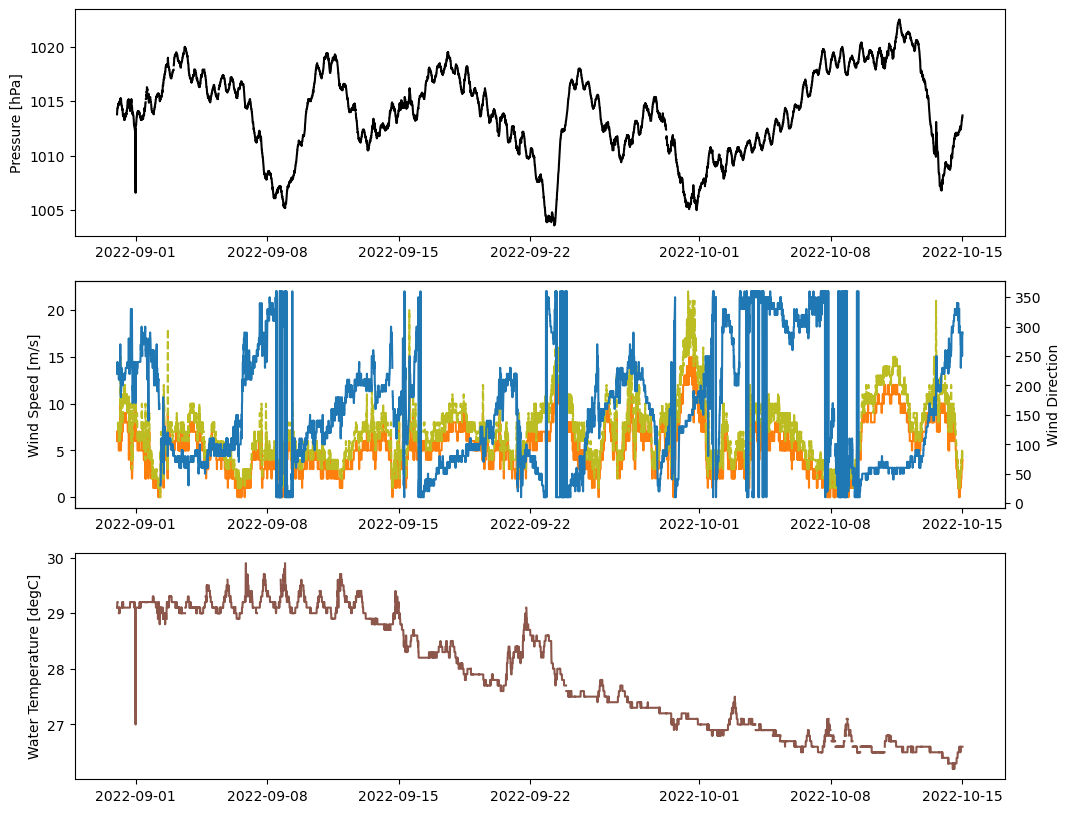

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (12, 10))
ax2b = ax2.twinx()

# Pressure
ax1.plot(df['time'], df['pressure'], color = 'black')
ax1.set_ylabel('Pressure [hPa]')

# Wind speed, gust, direction
ax2.plot(df['time'], df['wind_speed'], color = 'tab:orange')
ax2.plot(df['time'], df['wind_gust'], color = 'tab:olive', linestyle = '--')
ax2b.plot(df['time'], df['wind_direction'], color = 'tab:blue', linestyle = '-')
ax2.set_ylabel('Wind Speed [m/s]')
ax2b.set_ylabel('Wind Direction')

# Water temperature
ax3.plot(df['time'], df['water_temperature'], color = 'tab:brown')
ax3.set_ylabel('Water Temperature [degC]')